In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart=pd.read_csv('heart.csv')

In [3]:
heart.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
heart.shape

(4238, 16)

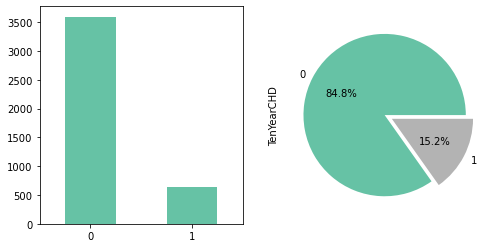

In [5]:
#For Target Variable
plt.rcParams['figure.figsize'] = 8,4
fig,ax = plt.subplots(1,2)
heart['TenYearCHD'].value_counts().plot(kind='bar',rot=0,ax=ax[0],cmap='Set2')
heart['TenYearCHD'].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1],cmap='Set2',explode=[0,0.1])
plt.show()

In [6]:
heart['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [7]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
heart["education"].fillna(0, inplace=True)

In [9]:
heart.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
heart['cigsPerDay'].fillna(heart['cigsPerDay'].mean(), inplace=True)

In [11]:
heart.at[1044,'BPMeds'] = 1
heart.at[769,'BPMeds'] = 0

In [12]:
heart.BPMeds.fillna(0, inplace=True)

In [13]:
m = heart.totChol.mode()
heart.totChol.fillna(m[0], inplace=True)

In [14]:
m = heart.heartRate.mode()
heart.heartRate.fillna(m[0], inplace=True)

In [15]:
m = heart.BMI.mode()
heart.BMI.fillna(m[0], inplace=True)

In [16]:
m = heart.glucose.mode()
heart.glucose.fillna(m[0], inplace=True)

In [17]:
heart.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [19]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
heart['BPMeds'].value_counts()

0.0    4113
1.0     125
Name: BPMeds, dtype: int64

In [21]:
heart['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

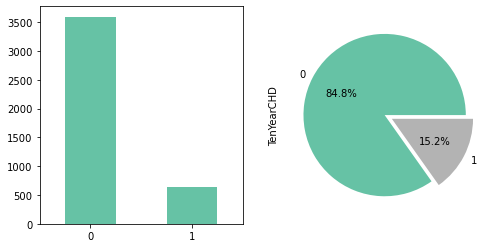

In [22]:
#For Target Variable
plt.rcParams['figure.figsize'] = 8,4
fig,ax = plt.subplots(1,2)
heart['TenYearCHD'].value_counts().plot(kind='bar',rot=0,ax=ax[0],cmap='Set2')
heart['TenYearCHD'].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1],cmap='Set2',explode=[0,0.1])
plt.show()

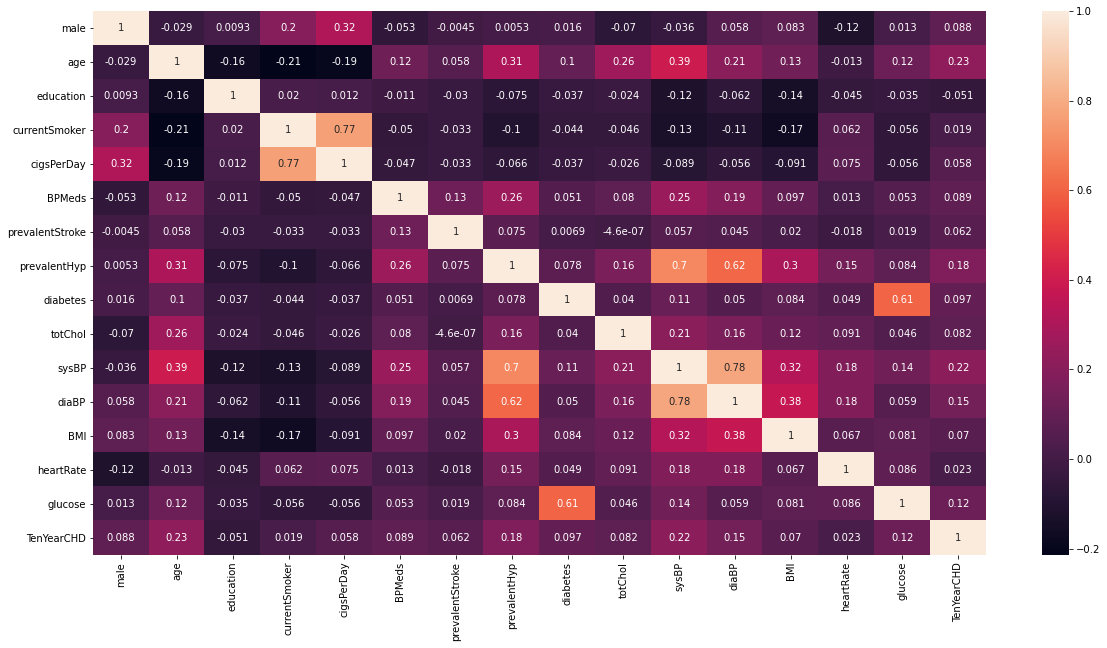

In [23]:
plt.figure(figsize = (20,10))       
sns.heatmap(heart.corr(),annot = True)
plt.show()

In [24]:
cor_matrix = heart.corr().abs()
print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000  0.028979   0.009271       0.197596    0.316807   
age              0.028979  1.000000   0.162404       0.213748    0.192366   
education        0.009271  0.162404   1.000000       0.020058    0.011734   
currentSmoker    0.197596  0.213748   0.020058       1.000000    0.766970   
cigsPerDay       0.316807  0.192366   0.011734       0.766970    1.000000   
BPMeds           0.052554  0.122993   0.010915       0.049549    0.046542   
prevalentStroke  0.004546  0.057655   0.029991       0.032988    0.032706   
prevalentHyp     0.005313  0.307194   0.074963       0.103260    0.065947   
diabetes         0.015708  0.101258   0.037320       0.044295    0.037063   
totChol          0.070481  0.260455   0.024150       0.046064    0.025835   
sysBP            0.035989  0.394302   0.121446       0.130230    0.088505   
diaBP            0.057933  0.206104   0.062326       0.107746    0.056391   

In [25]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.50)]
print(); print(to_drop)


['cigsPerDay', 'sysBP', 'diaBP', 'glucose']


In [26]:
heart = heart.drop('education',axis=1)
heart = heart.drop('currentSmoker',axis=1)
heart = heart.drop('sysBP',axis=1)
heart = heart.drop('diabetes',axis=1)

In [27]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [28]:
X = heart.drop('TenYearCHD', axis=1 )
X.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,diaBP,BMI,heartRate,glucose
0,1,39,0.0,0.0,0,0,195.0,70.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,0,250.0,81.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,0,245.0,80.0,25.34,75.0,70.0
3,0,61,30.0,0.0,0,1,225.0,95.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,0,285.0,84.0,23.10,85.0,85.0


In [29]:
y= heart['TenYearCHD']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
num_vars = X.select_dtypes(include =["float"]).columns

num_vars = list(num_vars)

num_vars


['cigsPerDay', 'BPMeds', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [31]:
X[num_vars] = sc.fit_transform(X[num_vars])

X.head(10)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,diaBP,BMI,heartRate,glucose
0,1,39,0.000000,0.0,0,0,0.149406,0.232804,0.277024,0.363636,0.104520
1,0,46,0.000000,0.0,0,0,0.242784,0.349206,0.319680,0.515152,0.101695
2,1,48,0.285714,0.0,0,0,0.234295,0.338624,0.237518,0.313131,0.084746
3,0,61,0.428571,0.0,0,1,0.200340,0.497354,0.316045,0.212121,0.177966
4,0,46,0.328571,0.0,0,0,0.302207,0.380952,0.183228,0.414141,0.127119
5,0,43,0.000000,0.0,0,1,0.205433,0.656085,0.357731,0.333333,0.166667
6,0,63,0.000000,0.0,0,0,0.166384,0.243386,0.425836,0.161616,0.127119
7,0,45,0.285714,0.0,0,0,0.349745,0.243386,0.148812,0.353535,0.107345
8,1,52,0.000000,0.0,0,1,0.259762,0.433862,0.262239,0.323232,0.110169
9,1,43,0.428571,0.0,0,1,0.200340,0.624339,0.195589,0.494949,0.135593


In [32]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [33]:
## Get the Fraud and the normal dataset 

fraud = heart[heart['TenYearCHD']==1]

normal = heart[heart['TenYearCHD']==0]

In [34]:
fraud.shape

(644, 12)

In [35]:
normal.shape

(3594, 12)

# Oversampling

In [36]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X,y=smk.fit_sample(X,y)


In [37]:
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,diaBP,BMI,heartRate,glucose
0,1,39,0.000000,0.0,0,0,0.149406,0.232804,0.277024,0.363636,0.104520
1,0,46,0.000000,0.0,0,0,0.242784,0.349206,0.319680,0.515152,0.101695
2,1,48,0.285714,0.0,0,0,0.234295,0.338624,0.237518,0.313131,0.084746
3,0,61,0.428571,0.0,0,1,0.200340,0.497354,0.316045,0.212121,0.177966
4,0,46,0.328571,0.0,0,0,0.302207,0.380952,0.183228,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,61,0.177985,0.0,0,1,0.179688,0.715498,0.249545,0.431528,0.120173
7046,0,66,0.000000,0.0,0,1,0.224789,0.447409,0.290887,0.558254,0.179208
7047,1,52,0.350778,0.0,0,0,0.293903,0.386924,0.202545,0.322132,0.202942
7048,1,43,0.331394,0.0,0,0,0.146469,0.446998,0.276301,0.220196,0.122151


In [38]:
y

0       0
1       0
2       0
3       1
4       0
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: TenYearCHD, Length: 7050, dtype: int64

In [39]:
y.value_counts()

1    3525
0    3525
Name: TenYearCHD, dtype: int64

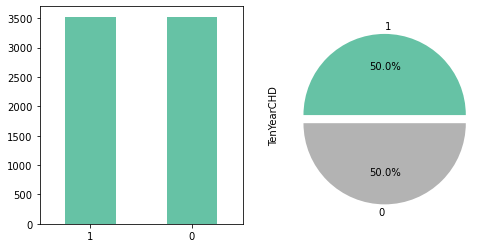

In [40]:
#For Target Variable
plt.rcParams['figure.figsize'] = 8,4
fig,ax = plt.subplots(1,2)
y.value_counts().plot(kind='bar',rot=0,ax=ax[0],cmap='Set2')
y.value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1],cmap='Set2',explode=[0,0.1])
plt.show()

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Train Test Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [43]:
X_train

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,diaBP,BMI,heartRate,glucose
15,0,38,0.285714,0.000000,0,1,0.193548,0.444444,0.140814,0.515152,0.084746
6372,1,52,0.427411,0.983757,0,1,0.221528,0.574007,0.323611,0.462185,0.151762
315,0,60,0.000000,0.000000,0,0,0.375212,0.232804,0.165293,0.313131,0.064972
2445,1,46,0.000000,0.000000,0,1,0.327674,0.534392,0.360397,0.161616,0.110169
5008,0,62,0.000000,0.000000,0,0,0.258228,0.222222,0.182899,0.218735,0.114744
...,...,...,...,...,...,...,...,...,...,...,...
3772,1,48,0.571429,0.000000,0,0,0.205433,0.232804,0.143723,0.262626,0.101695
5191,1,51,0.285714,0.000000,0,0,0.191881,0.250344,0.145851,0.336761,0.098750
5226,1,62,0.007198,0.000000,0,1,0.227090,0.495355,0.237335,0.196500,0.084532
5390,1,49,0.010191,0.000000,0,0,0.188877,0.388600,0.417096,0.383341,0.101108


# Ada Boosting

In [44]:
from sklearn.ensemble import RandomForestClassifier
base_model = AdaBoostClassifier(n_estimators=10,learning_rate=1, random_state=0)
base_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=10, random_state=0)

In [46]:
y_pred=base_model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       718
           1       0.66      0.69      0.68       692

    accuracy                           0.68      1410
   macro avg       0.68      0.68      0.68      1410
weighted avg       0.68      0.68      0.68      1410



In [49]:
from sklearn import metrics

In [50]:
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[472, 246],
       [212, 480]], dtype=int64)

In [51]:
print ('Train Accuracy :',base_model.score(X_train,y_train))
print ('Test Accuracy :',base_model.score(X_test,y_test))

Train Accuracy : 0.6893617021276596
Test Accuracy : 0.675177304964539


In [52]:
X_train

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,diaBP,BMI,heartRate,glucose
15,0,38,0.285714,0.000000,0,1,0.193548,0.444444,0.140814,0.515152,0.084746
6372,1,52,0.427411,0.983757,0,1,0.221528,0.574007,0.323611,0.462185,0.151762
315,0,60,0.000000,0.000000,0,0,0.375212,0.232804,0.165293,0.313131,0.064972
2445,1,46,0.000000,0.000000,0,1,0.327674,0.534392,0.360397,0.161616,0.110169
5008,0,62,0.000000,0.000000,0,0,0.258228,0.222222,0.182899,0.218735,0.114744
...,...,...,...,...,...,...,...,...,...,...,...
3772,1,48,0.571429,0.000000,0,0,0.205433,0.232804,0.143723,0.262626,0.101695
5191,1,51,0.285714,0.000000,0,0,0.191881,0.250344,0.145851,0.336761,0.098750
5226,1,62,0.007198,0.000000,0,1,0.227090,0.495355,0.237335,0.196500,0.084532
5390,1,49,0.010191,0.000000,0,0,0.188877,0.388600,0.417096,0.383341,0.101108


In [53]:
y_train

15      1
6372    1
315     1
2445    0
5008    1
       ..
3772    0
5191    1
5226    1
5390    1
860     1
Name: TenYearCHD, Length: 5640, dtype: int64

In [54]:
y_train.value_counts()

1    2833
0    2807
Name: TenYearCHD, dtype: int64

In [55]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [56]:
df2.head(20)

,Actual,Predicted
5648,1,0
503,0,0
2183,0,0
5040,1,1
994,0,0
6535,1,1
1219,0,0
6713,1,0
6786,1,0
6690,1,0


In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



params = {
    "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],
    "n_estimators":[10,20,30,40,50,60,70,80,90,100,200,300,400,700,800,900]
    
}


final_model = AdaBoostClassifier(random_state=0)
final_model= GridSearchCV(final_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
final_model.fit(X_train, y_train)
best_params = final_model.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 304 candidates, totalling 912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 912 out of 912 | elapsed:  9.4min finished


Best paramters: {'learning_rate': 1, 'n_estimators': 900})


In [177]:
final_model = AdaBoostClassifier(n_estimators=900,learning_rate=1, random_state=0)
final_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=900, random_state=0)

In [182]:
final_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=900, random_state=0)

In [183]:
y_pred=final_model.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [184]:
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       718
           1       0.86      0.81      0.84       692

    accuracy                           0.84      1410
   macro avg       0.84      0.84      0.84      1410
weighted avg       0.84      0.84      0.84      1410



In [185]:
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[627,  91],
       [130, 562]], dtype=int64)

In [187]:
print ('Train Accuracy :',final_model.score(X_train,y_train))
print ('Test Accuracy :',final_model.score(X_test,y_test))

Train Accuracy : 0.8709219858156029
Test Accuracy : 0.8432624113475178


In [188]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [189]:
df2.head(20)

,Actual,Predicted
5648,1,1
503,0,0
2183,0,0
5040,1,1
994,0,0
6535,1,1
1219,0,0
6713,1,1
6786,1,1
6690,1,1


In [195]:
comparison_column = np.where(df2["Actual"] == df2["Predicted"], True, False)

In [197]:
df2["correct"]=comparison_column

In [198]:
df2

,Actual,Predicted,correct
5648,1,1,True
503,0,0,True
2183,0,0,True
5040,1,1,True
994,0,0,True
...,...,...,...
3784,0,0,True
926,0,0,True
2488,0,0,True
3221,0,0,True


In [200]:
df2.correct.value_counts()

True     1189
False     221
Name: correct, dtype: int64

In [201]:
df2.to_csv('final_output2.csv')

# Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [58]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [60]:
y_pred=gradient_booster.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       718
           1       0.81      0.79      0.80       692

    accuracy                           0.81      1410
   macro avg       0.81      0.81      0.81      1410
weighted avg       0.81      0.81      0.81      1410



In [62]:
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[586, 132],
       [142, 550]], dtype=int64)

In [64]:
print ('Train Accuracy :',gradient_booster.score(X_train,y_train))
print ('Test Accuracy :',gradient_booster.score(X_test,y_test))

Train Accuracy : 0.8356382978723405
Test Accuracy : 0.8056737588652483


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    "n_estimators":[100,200,300,400],'max_depth': [3, 4, 5, 6,7]
    
}

final_model = GradientBoostingClassifier(random_state=0)
final_model= GridSearchCV(final_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
final_model.fit(X_train, y_train)
best_params = final_model.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 14.7min finished


Best paramters: {'learning_rate': 0.6, 'max_depth': 7, 'n_estimators': 300})


In [128]:
final_model = GradientBoostingClassifier(n_estimators=300,learning_rate=0.1, max_depth = 4, random_state=0)
final_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=300, random_state=0)

In [129]:
y_pred=final_model.predict(X_test)

In [130]:
print(classification_report(y_test, y_pred, ))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       718
           1       0.92      0.83      0.88       692

    accuracy                           0.88      1410
   macro avg       0.89      0.88      0.88      1410
weighted avg       0.89      0.88      0.88      1410



In [131]:
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[670,  48],
       [116, 576]], dtype=int64)

In [132]:
print ('Train Accuracy :',final_model.score(X_train,y_train))
print ('Test Accuracy :',final_model.score(X_test,y_test))

Train Accuracy : 0.95
Test Accuracy : 0.8836879432624114


In [133]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [134]:
df2.head(20)

,Actual,Predicted
5648,1,1
503,0,0
2183,0,0
5040,1,1
994,0,0
6535,1,1
1219,0,0
6713,1,1
6786,1,1
6690,1,1


In [135]:
comparison_column = np.where(df2["Actual"] == df2["Predicted"], True, False)

In [136]:
df2["correct"]=comparison_column

In [137]:
df2

,Actual,Predicted,correct
5648,1,1,True
503,0,0,True
2183,0,0,True
5040,1,1,True
994,0,0,True
...,...,...,...
3784,0,0,True
926,0,0,True
2488,0,0,True
3221,0,0,True


In [138]:
df2.correct.value_counts()

True     1246
False     164
Name: correct, dtype: int64

# XGBoosting

In [44]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

[15:00:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
xgboost.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, preds, ))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       718
           1       0.90      0.85      0.87       692

    accuracy                           0.88      1410
   macro avg       0.88      0.88      0.88      1410
weighted avg       0.88      0.88      0.88      1410



In [50]:
print ('Train Accuracy :',xgboost.score(X_train,y_train))
print ('Test Accuracy :',xgboost.score(X_test,y_test))

Train Accuracy : 0.9843971631205674
Test Accuracy : 0.8780141843971632


In [53]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, preds )
confusion

array([[650,  68],
       [104, 588]], dtype=int64)

In [126]:
xgboost = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500, gamma=7, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

[15:19:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, preds, ))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88       718
           1       0.92      0.83      0.87       692

    accuracy                           0.88      1410
   macro avg       0.88      0.88      0.88      1410
weighted avg       0.88      0.88      0.88      1410



In [128]:
print ('Train Accuracy :',xgboost.score(X_train,y_train))
print ('Test Accuracy :',xgboost.score(X_test,y_test))

Train Accuracy : 0.9074468085106383
Test Accuracy : 0.8765957446808511


In [129]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, preds )
confusion

array([[665,  53],
       [121, 571]], dtype=int64)

In [130]:
df2 = pd.DataFrame({'Actual':y_test,'Predicted':preds})

In [131]:
df2.head(20)

,Actual,Predicted
5648,1,1
503,0,0
2183,0,0
5040,1,1
994,0,0
6535,1,1
1219,0,0
6713,1,1
6786,1,1
6690,1,1


In [132]:
comparison_column = np.where(df2["Actual"] == df2["Predicted"], True, False)

In [133]:
df2["correct"]=comparison_column

In [134]:
df2.to_csv('final_output_XGBoostingClassifier.csv')